In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

C:\Users\AMB\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\AMB\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\AMB\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.8374 - loss: 0.5197 - val_accuracy: 0.9793 - val_loss: 0.0678
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9814 - loss: 0.0586 - val_accuracy: 0.9845 - val_loss: 0.0495
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9887 - loss: 0.0369 - val_accuracy: 0.9892 - val_loss: 0.0390
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9897 - loss: 0.0317 - val_accuracy: 0.9854 - val_loss: 0.0486
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9927 - loss: 0.0243 - val_accuracy: 0.9881 - val_loss: 0.0416


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9857 - loss: 0.0399
Test accuracy: 0.9896000027656555


In [7]:
predictions = model.predict(test_images)

# Example: predicting the first image in the test set
predicted_label = predictions[0].argmax()
print(f"Predicted label: {predicted_label}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted label: 7


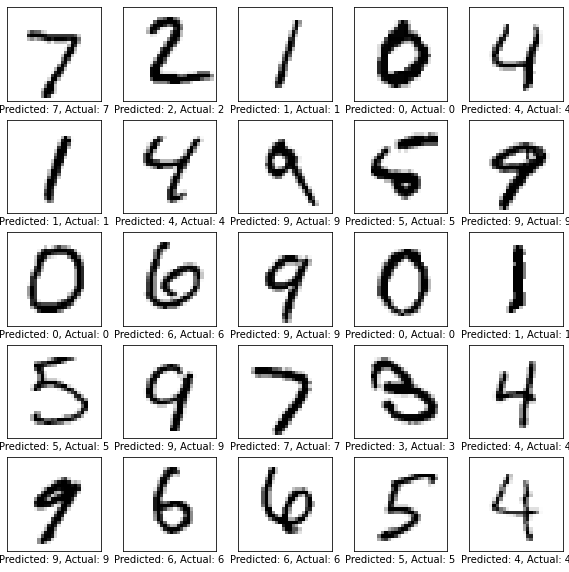

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {predictions[i].argmax()}, Actual: {test_labels[i]}")
plt.show()